# Sleep data analysis with R

For 4 weeks commencing on 26/10/2023, I (a 44 year old male) started a nonblinded randomised controlled crossover trial to determine the effects of the following interventions on sleep quality (Likert scale 1-5), sleep duration (hours), sleep onset latency (minutes), and wakefullness after sleep onset (Likert scale 1-5):
- 1 week of daily pre-bed melatonin (0.5 mg oral, 30 mins before bed),
- 1 week of daily pre-bed binaural beats (10 minutes, 30 mins before bed),
- 1 week of pre-bed melatonin combined with binaural beats, versus
- 1 week of no daily treatment (control).

To help understand the factors that might influence my sleep quality and quantity, I also measured several variables including my food, caffeine, alcohol, and chocolate intake, the timing of pre-bed food/caffeine/alcohol/chocolate intake, caffeine, pre-bed phone use, daily exercise (duration, intensity, load), exposure to sunlight, work stress, life stress, illness, and bed time.

## Check R version

In [2]:
# check R version
R.version.string

[1] "R version 4.4.1 (2024-06-14)"

## Install packages

In [3]:
# print installed packages
print(installed.packages())

               Package          LibPath                         Version     
abind          "abind"          "/usr/local/lib/R/site-library" "1.4-8"     
broom          "broom"          "/usr/local/lib/R/site-library" "1.0.7"     
carData        "carData"        "/usr/local/lib/R/site-library" "3.0-5"     
corrplot       "corrplot"       "/usr/local/lib/R/site-library" "0.94"      
cowplot        "cowplot"        "/usr/local/lib/R/site-library" "1.1.3"     
Deriv          "Deriv"          "/usr/local/lib/R/site-library" "4.1.6"     
doBy           "doBy"           "/usr/local/lib/R/site-library" "4.6.24"    
ggrepel        "ggrepel"        "/usr/local/lib/R/site-library" "0.9.6"     
ggsci          "ggsci"          "/usr/local/lib/R/site-library" "3.2.0"     
ggsignif       "ggsignif"       "/usr/local/lib/R/site-library" "0.6.4"     
ggthemes       "ggthemes"       "/usr/local/lib/R/site-library" "5.1.0"     
gridExtra      "gridExtra"      "/usr/local/lib/R/site-library" "2.3"       

In [18]:
# Load libraries
library(tidyverse) # core tidyverse packages (ggplot2, dplyr, tibble, tidyr, readr, etc)
library(stats) # for statistical analyses https://www.rdocumentation.org/packages/stats/versions/3.6.2
library(broom) # for statistical outputs in a table https://broom.tidymodels.org/articles/broom.html
library(sigr) # for statistical outputs in a sentence https://www.rdocumentation.org/packages/sigr/
library(infer) # for statistical inference https://infer.netlify.app/
library(ggthemes) # themes for ggplot2 https://www.rdocumentation.org/packages/ggthemes/versions/5.1.0

## Load data and view dataframe

In [25]:
# Read a CSV file using pandas
df <- read.csv("/20231201_sleep_data.csv")

# Show first few rows
df

Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,⋯,Life_stress,Illness,Melotonin,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group
<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>
1,3.50,1,1,2,1.00,1,2,13.0,1,⋯,1,0,0,1,1410,60,7.00,4,1,Binaural Beats
2,5.00,0,1,2,2.00,1,1,14.0,1,⋯,1,0,0,1,1410,30,6.50,1,2,Binaural Beats
3,6.00,1,1,4,1.50,1,1,15.0,0,⋯,2,0,0,1,1530,15,7.00,2,2,Binaural Beats
4,3.00,0,1,2,6.00,1,2,9.0,0,⋯,1,0,0,1,1410,15,7.00,0,3,Binaural Beats
5,3.50,1,0,0,NA,1,1,15.0,0,⋯,1,0,0,1,1410,15,7.00,0,3,Binaural Beats
6,3.00,1,0,0,NA,1,1,14.0,1,⋯,1,0,0,1,1410,15,6.50,2,1,Binaural Beats
7,4.00,1,0,0,NA,1,2,7.5,0,⋯,1,1,0,1,1350,45,7.50,1,2,Binaural Beats
8,3.50,1,0,0,NA,1,1,13.5,1,⋯,2,0,1,1,1410,15,6.50,0,2,Melotonin + Binaural Beats
9,2.75,0,0,0,NA,1,1,14.0,1,⋯,1,0,1,1,1410,15,7.50,0,3,Melotonin + Binaural Beats


In [7]:
# check data type of every variable in data frame
str(df)

'data.frame':	28 obs. of  33 variables:
 $ Day                               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Dinner_time_before_bed            : num  3.5 5 6 3 3.5 3 4 3.5 2.75 3 ...
 $ Post_dinner_snacks                : int  1 0 1 0 1 1 1 1 0 0 ...
 $ Alcohol                           : int  1 1 1 1 0 0 0 0 0 0 ...
 $ Alcohol_units                     : int  2 2 4 2 0 0 0 0 0 0 ...
 $ Alcohol_time_before_bed           : num  1 2 1.5 6 NA NA NA NA NA NA ...
 $ Caffeinated_drinks                : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Caffeinated_drink_units           : int  2 1 1 2 1 1 2 1 1 1 ...
 $ Caffeinated_drinks_time_before_bed: num  13 14 15 9 15 14 7.5 13.5 14 13.5 ...
 $ Chocolate                         : int  1 1 0 0 0 1 0 1 1 1 ...
 $ Chocolate_time_before_bed         : num  2 6 NA NA NA 11 NA 1.5 6 9.5 ...
 $ Phone_use_before_bed              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Phone_use_duration                : int  5 15 5 5 5 20 15 10 2 15 ...
 $ Phone_use_time_before_bed  

In [10]:
# Get the Shape of the Data Frame (the number of rows and the number of columns, respectively)
dim(df)

[1] 28 33

In [8]:
# Summarise the values
summary(df)

      Day        Dinner_time_before_bed Post_dinner_snacks    Alcohol      
 Min.   : 1.00   Min.   :2.500          Min.   :0.0000     Min.   :0.0000  
 1st Qu.: 7.75   1st Qu.:3.000          1st Qu.:0.0000     1st Qu.:0.0000  
 Median :14.50   Median :3.500          Median :1.0000     Median :1.0000  
 Mean   :14.50   Mean   :3.625          Mean   :0.6071     Mean   :0.5714  
 3rd Qu.:21.25   3rd Qu.:3.625          3rd Qu.:1.0000     3rd Qu.:1.0000  
 Max.   :28.00   Max.   :7.500          Max.   :1.0000     Max.   :1.0000  
                                                                           
 Alcohol_units   Alcohol_time_before_bed Caffeinated_drinks
 Min.   :0.000   Min.   :1.000           Min.   :1         
 1st Qu.:0.000   1st Qu.:1.500           1st Qu.:1         
 Median :1.000   Median :1.875           Median :1         
 Mean   :1.107   Mean   :2.297           Mean   :1         
 3rd Qu.:2.000   3rd Qu.:2.125           3rd Qu.:1         
 Max.   :4.000   Max.   :6.000  

## Handle missing values
The NA values (missing values) should NOT be dropped but set as zero using fill_value=0.

In [11]:
# Quantify the number of missing values
sapply(df, function(x) sum(is.na(x)))  # count total missing values in each column of data frame

Day             Dinner_time_before_bed 
                                 0                                  0 
                Post_dinner_snacks                            Alcohol 
                                 0                                  0 
                     Alcohol_units            Alcohol_time_before_bed 
                                 0                                 12 
                Caffeinated_drinks            Caffeinated_drink_units 
                                 0                                  0 
Caffeinated_drinks_time_before_bed                          Chocolate 
                                 0                                  0 
         Chocolate_time_before_bed               Phone_use_before_bed 
                                10                                  0 
                Phone_use_duration          Phone_use_time_before_bed 
                                 0                                  0 
                          Exercise                  Exercise_duration 
                                 0                                  2 
                Exercise_intensity                      Exercise_load 
                                 2                                  2 
          Exercise_time_before_bed            Did_I_go_outdoors_today 
                                 2                                  0 
       Direct_sunlight_for_30_mins                               Work 
                                 0                                  0 
                       Work_stress                        Life_stress 
                                 0                                  0 
                           Illness                          Melotonin 
                                 0                                  0 
                    Binaural_beats                           Bed_time 
                                 0                                  0 
               Sleep_onset_latency                   Total_sleep_time 
                                 0                                  0 
     Wakefulness_after_sleep_onset                      Sleep_quality 
                                 0                                  0 
                             Group 
                                 0

In [13]:
# Replace NaN with 0 in the entire data frame
df[is.na(df)] <- 0

# Show first few rows
head(df)

,Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,⋯,Life_stress,Illness,Melotonin,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>
1,1,3.5,1,1,2,1.0,1,2,13,1,⋯,1,0,0,1,1410,60,7.0,4,1,Binaural Beats
2,2,5.0,0,1,2,2.0,1,1,14,1,⋯,1,0,0,1,1410,30,6.5,1,2,Binaural Beats
3,3,6.0,1,1,4,1.5,1,1,15,0,⋯,2,0,0,1,1530,15,7.0,2,2,Binaural Beats
4,4,3.0,0,1,2,6.0,1,2,9,0,⋯,1,0,0,1,1410,15,7.0,0,3,Binaural Beats
5,5,3.5,1,0,0,0.0,1,1,15,0,⋯,1,0,0,1,1410,15,7.0,0,3,Binaural Beats
6,6,3.0,1,0,0,0.0,1,1,14,1,⋯,1,0,0,1,1410,15,6.5,2,1,Binaural Beats


In [14]:
# Re-quantify the number of missing values
sapply(df, function(x) sum(is.na(x)))  # count total missing values in each column of data frame

Day             Dinner_time_before_bed 
                                 0                                  0 
                Post_dinner_snacks                            Alcohol 
                                 0                                  0 
                     Alcohol_units            Alcohol_time_before_bed 
                                 0                                  0 
                Caffeinated_drinks            Caffeinated_drink_units 
                                 0                                  0 
Caffeinated_drinks_time_before_bed                          Chocolate 
                                 0                                  0 
         Chocolate_time_before_bed               Phone_use_before_bed 
                                 0                                  0 
                Phone_use_duration          Phone_use_time_before_bed 
                                 0                                  0 
                          Exercise                  Exercise_duration 
                                 0                                  0 
                Exercise_intensity                      Exercise_load 
                                 0                                  0 
          Exercise_time_before_bed            Did_I_go_outdoors_today 
                                 0                                  0 
       Direct_sunlight_for_30_mins                               Work 
                                 0                                  0 
                       Work_stress                        Life_stress 
                                 0                                  0 
                           Illness                          Melotonin 
                                 0                                  0 
                    Binaural_beats                           Bed_time 
                                 0                                  0 
               Sleep_onset_latency                   Total_sleep_time 
                                 0                                  0 
     Wakefulness_after_sleep_onset                      Sleep_quality 
                                 0                                  0 
                             Group 
                                 0

## Data viz

### Sleep quality

In [39]:
# Check the unique values of the Group column in the original data frame (df)
unique(df$Group)

[1] "Binaural Beats"             "Melotonin + Binaural Beats"
[3] "Melotonin"                  "Control"

# A tibble: 4 × 4
  Group                              n mean_sleep_quality sd_sleep_quality
  <fct>                          <int>              <dbl>            <dbl>
1 "Binaural\nBeats"                  7               2               0.816
2 "Control"                          7               1.57            0.787
3 "Melotonin"                        7               2               0.577
4 "Melotonin\n+ Binaural\nBeats"     7               2.29            0.756


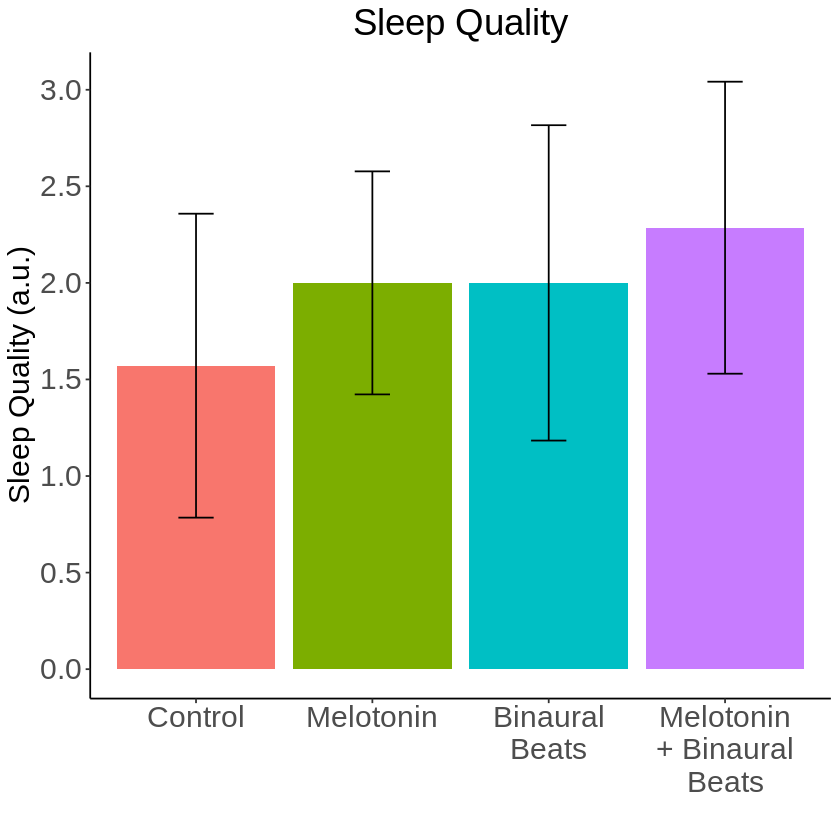

In [92]:
# Summarize the data: calculate the mean and standard deviation of Sleep_quality for each Group
summary_data_sleepQuality <- df %>%
  group_by(Group) %>%
  summarise(
    n = n(),  # Calculate the sample size for each group
    mean_sleep_quality = mean(Sleep_quality, na.rm = TRUE),
    sd_sleep_quality = sd(Sleep_quality, na.rm = TRUE)
  )

# Wrap the text for x-axis labels before setting factor levels
summary_data_sleepQuality$Group <- str_wrap(as.character(summary_data_sleepQuality$Group), width = 10)  # Adjust the width as needed

# Correctly order the Group factor levels AFTER wrapping text
summary_data_sleepQuality$Group <- factor(summary_data_sleepQuality$Group,
                             levels = str_wrap(c("Control", "Melotonin", "Binaural Beats", "Melotonin + Binaural Beats"), width = 10))

# Create the bar plot with error bars
ggplot(summary_data_sleepQuality, aes(x = Group, y = mean_sleep_quality, fill = Group)) +
  geom_bar(stat = "identity", show.legend = FALSE) +  # Create bars
  geom_errorbar(aes(ymin = mean_sleep_quality - sd_sleep_quality,
                    ymax = mean_sleep_quality + sd_sleep_quality),
                width = 0.2) +  # Error bars with specified width
  labs(title = "Sleep Quality",
       x = "",
       y = "Sleep Quality (a.u.)") +
  scale_y_continuous(breaks = seq(0, max(summary_data_sleepQuality$mean_sleep_quality + max(summary_data_sleepQuality$sd_sleep_quality)), by = 0.5)) +  # Set y-axis breaks
  theme_classic() +  # Use classic theme
  theme(
    plot.title = element_text(size = 22, hjust = 0.5),  # Center and increase title font size
    axis.title.x = element_text(size = 18),  # Increase x-axis title font size
    axis.title.y = element_text(size = 18),  # Increase y-axis title font size
    axis.text = element_text(size = 18) # Increase axis text font size
  )
print(summary_data_sleepQuality)

### Sleep duration

# A tibble: 4 × 4
  Group                              n mean_Total_sleep_time sd_Total_sleep_time
  <fct>                          <int>                 <dbl>               <dbl>
1 "Binaural\nBeats"                  7                  6.93               0.345
2 "Control"                          7                  7.21               0.796
3 "Melotonin"                        7                  7.07               0.450
4 "Melotonin\n+ Binaural\nBeats"     7                  7.25               0.924


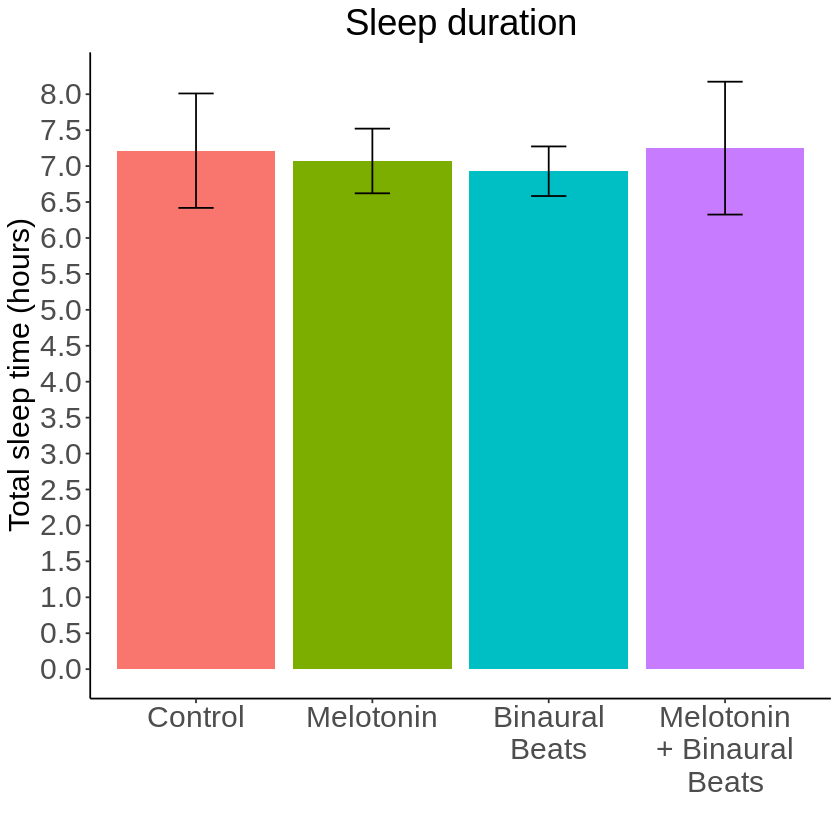

In [95]:
# Summarize the data: calculate the mean and standard deviation of Total_sleep_time for each Group
summary_data_sleepDuration <- df %>%
  group_by(Group) %>%
  summarise(
    n = n(),  # Calculate the sample size for each group
    mean_Total_sleep_time = mean(Total_sleep_time, na.rm = TRUE),
    sd_Total_sleep_time = sd(Total_sleep_time, na.rm = TRUE)
  )

# Wrap the text for x-axis labels before setting factor levels
summary_data_sleepDuration$Group <- str_wrap(as.character(summary_data_sleepDuration$Group), width = 10)  # Adjust the width as needed

# Correctly order the Group factor levels AFTER wrapping text
summary_data_sleepDuration$Group <- factor(summary_data_sleepDuration$Group,
                             levels = str_wrap(c("Control", "Melotonin", "Binaural Beats", "Melotonin + Binaural Beats"), width = 10))

# Create the bar plot with error bars
ggplot(summary_data_sleepDuration, aes(x = Group, y = mean_Total_sleep_time, fill = Group)) +
  geom_bar(stat = "identity", show.legend = FALSE) +  # Create bars
  geom_errorbar(aes(ymin = mean_Total_sleep_time - sd_Total_sleep_time,
                    ymax = mean_Total_sleep_time + sd_Total_sleep_time),
                width = 0.2) +  # Error bars with specified width
  labs(title = "Sleep duration",
       x = "",
       y = "Total sleep time (hours)") +
  scale_y_continuous(breaks = seq(0, max(summary_data_sleepDuration$mean_Total_sleep_time + max(summary_data_sleepDuration$sd_Total_sleep_time)), by = 0.5)) +  # Set y-axis breaks
  theme_classic() +  # Use classic theme
  theme(
    plot.title = element_text(size = 22, hjust = 0.5),  # Center and increase title font size
    axis.title.x = element_text(size = 18),  # Increase x-axis title font size
    axis.title.y = element_text(size = 18),  # Increase y-axis title font size
    axis.text = element_text(size = 18) # Increase axis text font size
  )
print(summary_data_sleepDuration)

### Sleep onset latency

# A tibble: 4 × 4
  Group                          n mean_Sleep_onset_lat…¹ sd_Sleep_onset_latency
  <fct>                      <int>                  <dbl>                  <dbl>
1 "Binaural\nBeats"              7                   27.9                  18.2 
2 "Control"                      7                   34.3                  20.7 
3 "Melotonin"                    7                   19.3                   7.32
4 "Melotonin\n+ Binaural\nB…     7                   19.3                   7.32
# ℹ abbreviated name: ¹​mean_Sleep_onset_latency


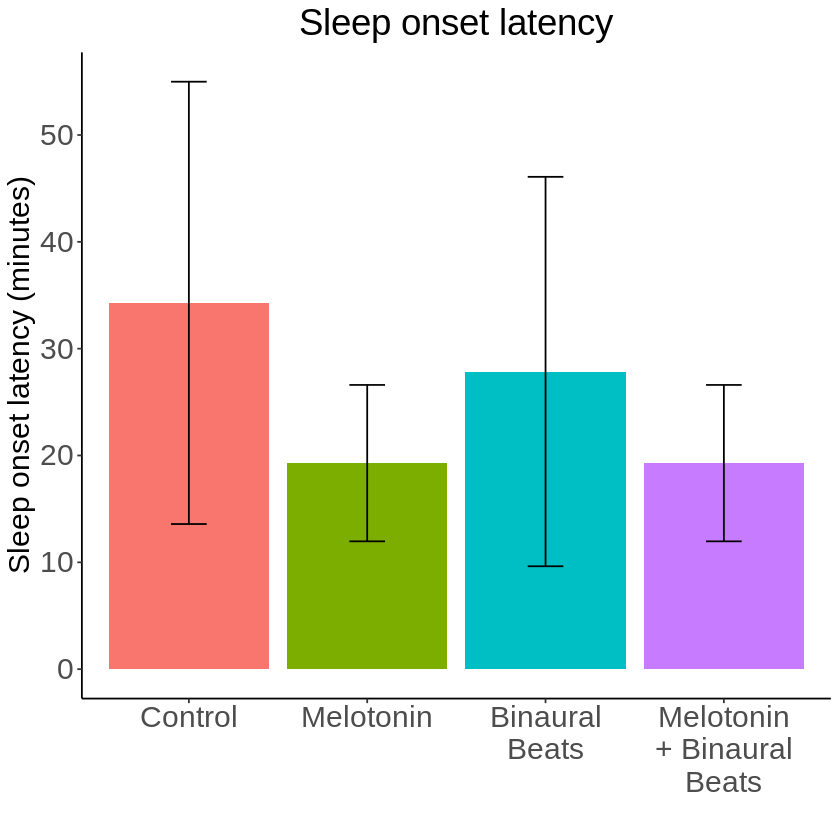

In [94]:
# Summarize the data: calculate the mean and standard deviation of Sleep_onset_latency for each Group
summary_data_sleepOnsetlatency <- df %>%
  group_by(Group) %>%
  summarise(
    n = n(),  # Calculate the sample size for each group
    mean_Sleep_onset_latency = mean(Sleep_onset_latency, na.rm = TRUE),
    sd_Sleep_onset_latency = sd(Sleep_onset_latency, na.rm = TRUE)
  )

# Wrap the text for x-axis labels before setting factor levels
summary_data_sleepOnsetlatency$Group <- str_wrap(as.character(summary_data_sleepOnsetlatency$Group), width = 10)  # Adjust the width as needed

# Correctly order the Group factor levels AFTER wrapping text
summary_data_sleepOnsetlatency$Group <- factor(summary_data_sleepOnsetlatency$Group,
                             levels = str_wrap(c("Control", "Melotonin", "Binaural Beats", "Melotonin + Binaural Beats"), width = 10))

# Create the bar plot with error bars
ggplot(summary_data_sleepOnsetlatency, aes(x = Group, y = mean_Sleep_onset_latency, fill = Group)) +
  geom_bar(stat = "identity", show.legend = FALSE) +  # Create bars
  geom_errorbar(aes(ymin = mean_Sleep_onset_latency - sd_Sleep_onset_latency,
                    ymax = mean_Sleep_onset_latency + sd_Sleep_onset_latency),
                width = 0.2) +  # Error bars with specified width
  labs(title = "Sleep onset latency",
       x = "",
       y = "Sleep onset latency (minutes)") +
  scale_y_continuous(breaks = seq(0, max(summary_data_sleepOnsetlatency$mean_Sleep_onset_latency + max(summary_data_sleepOnsetlatency$sd_Sleep_onset_latency)), by = 10)) +  # Set y-axis breaks
  theme_classic() +  # Use classic theme
  theme(
    plot.title = element_text(size = 22, hjust = 0.5),  # Center and increase title font size
    axis.title.x = element_text(size = 18),  # Increase x-axis title font size
    axis.title.y = element_text(size = 18),  # Increase y-axis title font size
    axis.text = element_text(size = 18) # Increase axis text font size
  )
print(summary_data_sleepOnsetlatency)

### Wakefullness

# A tibble: 4 × 4
  Group                          n mean_Wakefulness_aft…¹ sd_Wakefulness_after…²
  <fct>                      <int>                  <dbl>                  <dbl>
1 "Binaural\nBeats"              7                  1.43                   1.40 
2 "Control"                      7                  1.43                   1.13 
3 "Melotonin"                    7                  0.429                  0.535
4 "Melotonin\n+ Binaural\nB…     7                  0.571                  0.535
# ℹ abbreviated names: ¹​mean_Wakefulness_after_sleep_onset,
#   ²​sd_Wakefulness_after_sleep_onset


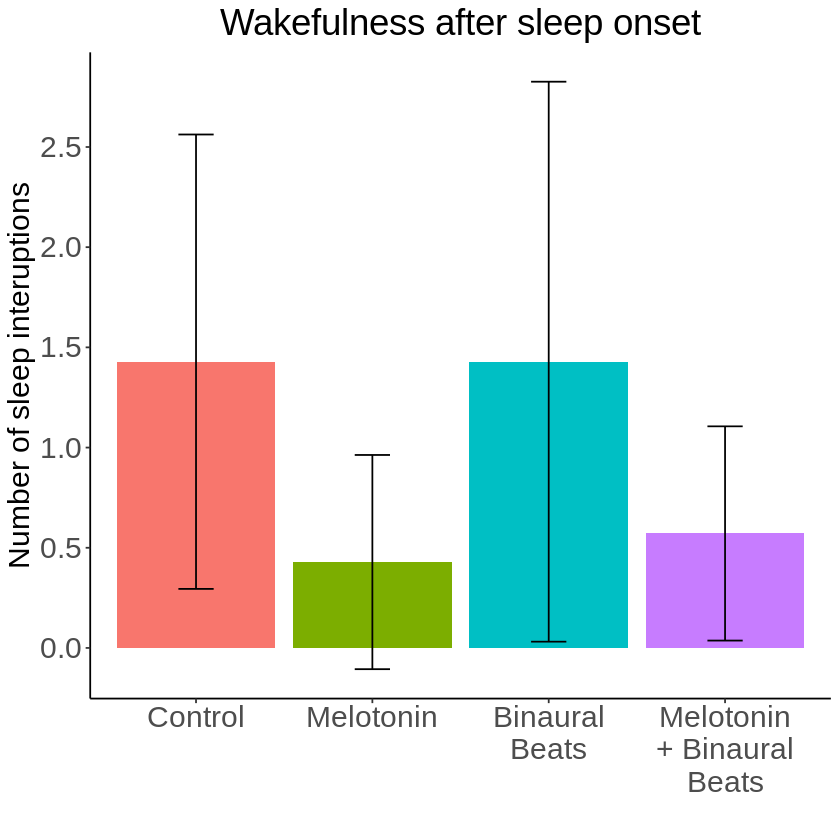

In [93]:
# Summarize the data: calculate the mean and standard deviation of Wakefulness_after_sleep_onset for each Group
summary_data_Wakefullness <- df %>%
  group_by(Group) %>%
  summarise(
    n = n(),  # Calculate the sample size for each group
    mean_Wakefulness_after_sleep_onset = mean(Wakefulness_after_sleep_onset, na.rm = TRUE),
    sd_Wakefulness_after_sleep_onset = sd(Wakefulness_after_sleep_onset, na.rm = TRUE)
  )

# Wrap the text for x-axis labels before setting factor levels
summary_data_Wakefullness$Group <- str_wrap(as.character(summary_data_Wakefullness$Group), width = 10)  # Adjust the width as needed

# Correctly order the Group factor levels AFTER wrapping text
summary_data_Wakefullness$Group <- factor(summary_data_Wakefullness$Group,
                             levels = str_wrap(c("Control", "Melotonin", "Binaural Beats", "Melotonin + Binaural Beats"), width = 10))

# Create the bar plot with error bars
ggplot(summary_data_Wakefullness, aes(x = Group, y = mean_Wakefulness_after_sleep_onset, fill = Group)) +
  geom_bar(stat = "identity", show.legend = FALSE) +  # Create bars
  geom_errorbar(aes(ymin = mean_Wakefulness_after_sleep_onset - sd_Wakefulness_after_sleep_onset,
                    ymax = mean_Wakefulness_after_sleep_onset + sd_Wakefulness_after_sleep_onset),
                width = 0.2) +  # Error bars with specified width
  labs(title = "Wakefulness after sleep onset",
       x = "",
       y = "Number of sleep interuptions") +
  scale_y_continuous(breaks = seq(0, max(summary_data_Wakefullness$mean_Wakefulness_after_sleep_onset + max(summary_data_Wakefullness$sd_Wakefulness_after_sleep_onset)), by = 0.5)) +  # Set y-axis breaks
  theme_classic() +  # Use classic theme
  theme(
    plot.title = element_text(size = 22, hjust = 0.5),  # Center and increase title font size
    axis.title.x = element_text(size = 18),  # Increase x-axis title font size
    axis.title.y = element_text(size = 18),  # Increase y-axis title font size
    axis.text = element_text(size = 18) # Increase axis text font size
  )
print(summary_data_Wakefullness)

# Statistical analyses

## Sleep quality

#### Normality
Shapiro-Wilk Test: Good for small to moderate sample sizes. <br>
Q-Q Plot: A visual method to assess normality.

In [56]:
# Perform Shapiro-Wilk test for normality on Sleep_quality
shapiro_test_result_SleepQuality <- shapiro.test(df$Sleep_quality)

# Print the result
print(shapiro_test_result_SleepQuality)

# Interpret the p-value
if (shapiro_test_result_SleepQuality$p.value < 0.05) {
  cat("P is less than 0.05, indicating that the data deviates from a normal distribution.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the data does not deviate from a normal distribution.\nThe data do not need to be scaled and a parametric test can be used.\n")
}


	Shapiro-Wilk normality test

data:  df$Sleep_quality
W = 0.81263, p-value = 0.0001798

P is less than 0.05, indicating that the data deviates from a normal distribution.
A nonparametric test should be used, or the data should be scaled before using a parametric test.


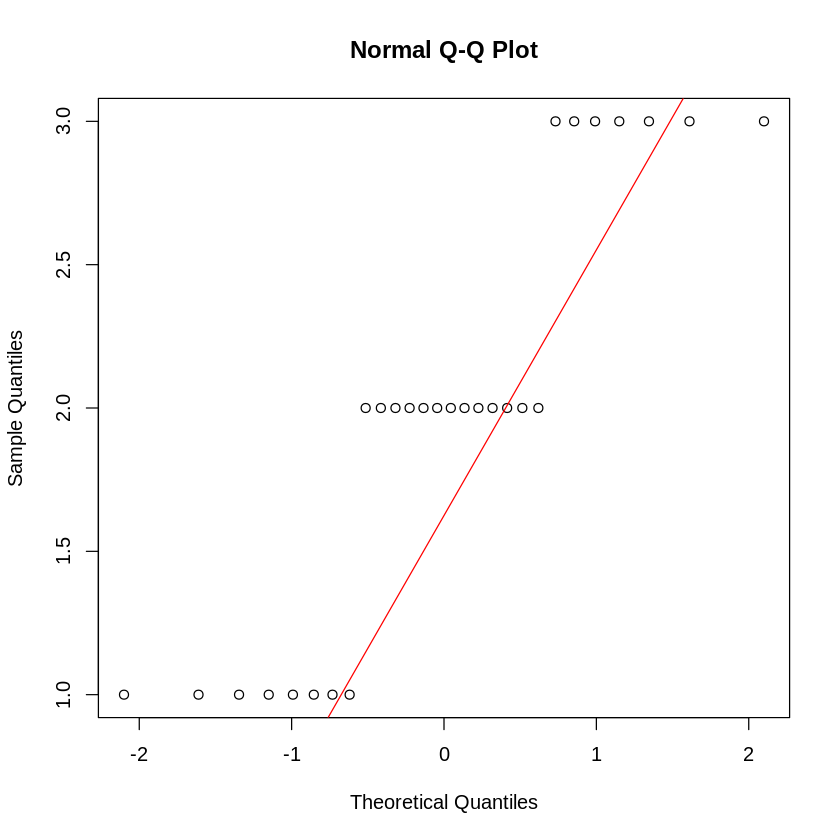

In [55]:
# Q-Q Plot for visual assessment of normality
qqnorm(df$Sleep_quality)
qqline(df$Sleep_quality, col = "red")  # Add reference line

#### Heteroscedasticity
Levene's Test: robust to non-normal data

In [59]:
# Install and load necessary package
install.packages("car")
library(car)

# Perform Levene's test
levene_test_result_SleepQuality <- leveneTest(Sleep_quality ~ Group, data = df, center=median)
print(levene_test_result_SleepQuality)

# Interpret the p-value
if (levene_test_result_SleepQuality$`Pr(>F)`[1] < 0.05) {
  cat("P is less than 0.05, indicating that there are significant differences in variances across groups.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the variances are equal across groups.\nA parametric test can be used.\n")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  3     0.4 0.7542
      24               
P is greater than or equal to 0.05, indicating that the variances are equal across groups.
A parametric test can be used.


Because the sleep quality data is psychometric and because it is not normally distributed, need to transform the data.

### Transform the sleep quality data
For psychometric data, it is most appropriate to transform to a percent of maximum value.

In [71]:
# Transform Sleep_quality to a percentage of maximum value (3)
df <- df %>%
  mutate(Sleep_quality_percent = (Sleep_quality / 3) * 100)

# Print the first few rows of the transformed data
head(df)

,Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,⋯,Illness,Melotonin,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group,Sleep_quality_percent
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>
1,1,3.5,1,1,2,1.0,1,2,13,1,⋯,0,0,1,1410,60,7.0,4,1,Binaural Beats,33.33333
2,2,5.0,0,1,2,2.0,1,1,14,1,⋯,0,0,1,1410,30,6.5,1,2,Binaural Beats,66.66667
3,3,6.0,1,1,4,1.5,1,1,15,0,⋯,0,0,1,1530,15,7.0,2,2,Binaural Beats,66.66667
4,4,3.0,0,1,2,6.0,1,2,9,0,⋯,0,0,1,1410,15,7.0,0,3,Binaural Beats,100.00000
5,5,3.5,1,0,0,NA,1,1,15,0,⋯,0,0,1,1410,15,7.0,0,3,Binaural Beats,100.00000
6,6,3.0,1,0,0,NA,1,1,14,1,⋯,0,0,1,1410,15,6.5,2,1,Binaural Beats,33.33333


### One-way ANOVA

In [77]:
# Run One-Way ANOVA
anova_result_Sleep_quality_percent <- aov(Sleep_quality_percent ~ Group, data = df)

# Print ANOVA summary
anova_summary_Sleep_quality_percent <- summary(anova_result_Sleep_quality_percent)
print(anova_summary_Sleep_quality_percent)

# Check p-value of ANOVA
p_value_Sleep_quality_percent <- anova_summary_Sleep_quality_percent[[1]]["Pr(>F)"][1, 1]  # Extract the p-value from ANOVA summary

# Function to perform Post Hoc Tests only if ANOVA p-value < 0.05
if (p_value_Sleep_quality_percent < 0.05) {
  cat("ANOVA is significant (p =", round(p_value_Sleep_quality_percent, 4),"). Therefore, run post hoc tests...\n")
  post_hoc_result_Sleep_quality_percent <- TukeyHSD(anova_result_Sleep_quality_percent)

  # Print the results of the post hoc tests
  print(post_hoc_result_Sleep_quality_percent)

  # Visualize the results
  plot(post_hoc_result_Sleep_quality_percent)
} else {
  cat("ANOVA is not significant (p =", round(p_value_Sleep_quality_percent, 4),"). No post hoc tests will be run.\n")
}

            Df Sum Sq Mean Sq F value Pr(>F)
Group        3   2024   674.6   1.109  0.365
Residuals   24  14603   608.5               
ANOVA is not significant (p = 0.365 ). No post hoc tests will be run.


## Sleep duration

#### Normality
Shapiro-Wilk Test: Good for small to moderate sample sizes. <br>
Q-Q Plot: A visual method to assess normality.

In [65]:
# Perform Shapiro-Wilk test for normality on Sleep_quality
shapiro_test_result_SleepDuration <- shapiro.test(df$Total_sleep_time)

# Print the result
print(shapiro_test_result_SleepDuration)

# Interpret the p-value
if (shapiro_test_result_SleepDuration$p.value < 0.05) {
  cat("P is less than 0.05, indicating that the data deviates from a normal distribution.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the data does not deviate from a normal distribution.\nThe data do not need to be scaled and a parametric test can be used.\n")
}


	Shapiro-Wilk normality test

data:  df$Total_sleep_time
W = 0.95108, p-value = 0.2108

P is greater than or equal to 0.05, indicating that the data does not deviate from a normal distribution.
The data do not need to be scaled and a parametric test can be used.


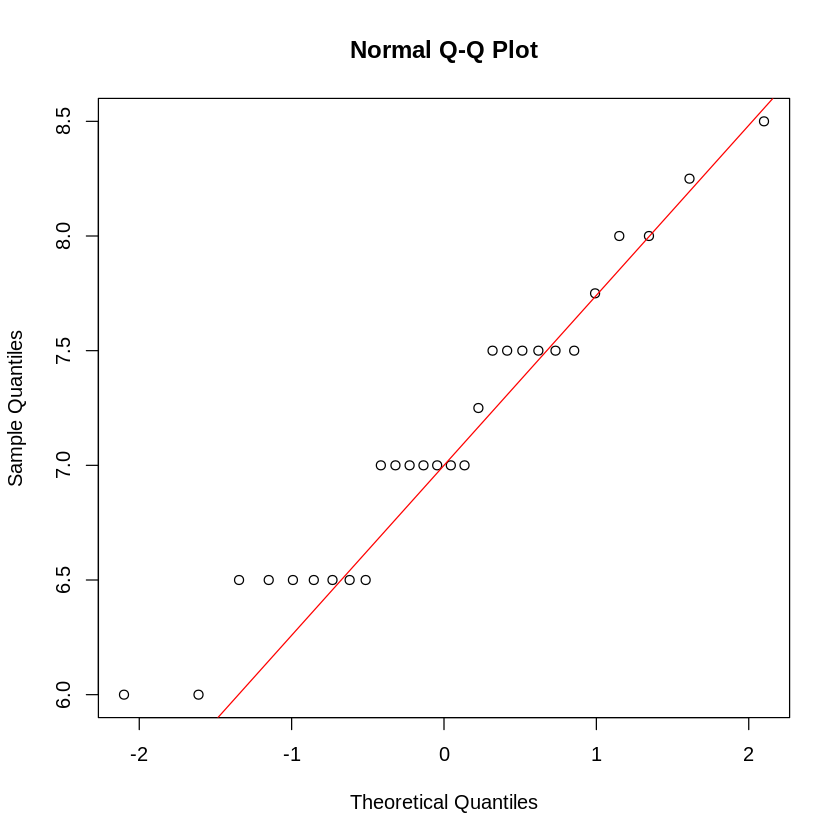

In [66]:
# Q-Q Plot for visual assessment of normality
qqnorm(df$Total_sleep_time)
qqline(df$Total_sleep_time, col = "red")  # Add reference line

#### Heteroscedasticity
Levene's Test: robust to non-normal data

In [64]:
# Perform Levene's test
levene_test_result_SleepDuration <- leveneTest(Total_sleep_time ~ Group, data = df, center=median)
print(levene_test_result_SleepDuration)

# Interpret the p-value
if (levene_test_result_SleepDuration$`Pr(>F)`[1] < 0.05) {
  cat("P is less than 0.05, indicating that there are significant differences in variances across groups.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the variances are equal across groups.\nA parametric test can be used.\n")
}

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
      Df F value  Pr(>F)  
group  3  2.6863 0.06917 .
      24                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
P is greater than or equal to 0.05, indicating that the variances are equal across groups.
A parametric test can be used.


### One-way ANOVA

In [78]:
# Run One-Way ANOVA
anova_result_Total_sleep_time <- aov(Total_sleep_time ~ Group, data = df)

# Print ANOVA summary
anova_summary_Total_sleep_time <- summary(anova_result_Total_sleep_time)
print(anova_summary_Total_sleep_time)

# Check p-value of ANOVA
p_value_Total_sleep_time <- anova_summary_Total_sleep_time[[1]]["Pr(>F)"][1, 1]  # Extract the p-value from ANOVA summary

# Function to perform Post Hoc Tests only if ANOVA p-value < 0.05
if (p_value_Total_sleep_time < 0.05) {
  cat("ANOVA is significant (p =", round(p_value_Total_sleep_time, 4),"). Therefore, run post hoc tests...\n")
  post_hoc_result_Total_sleep_time <- TukeyHSD(anova_result_Total_sleep_time)

  # Print the results of the post hoc tests
  print(post_hoc_result_Total_sleep_time)

  # Visualize the results
  plot(post_hoc_result_Total_sleep_time)
} else {
  cat("ANOVA is not significant (p =", round(p_value_Total_sleep_time, 4),"). No post hoc tests will be run.\n")
}

            Df Sum Sq Mean Sq F value Pr(>F)
Group        3  0.453  0.1510   0.334  0.801
Residuals   24 10.857  0.4524               
ANOVA is not significant (p = 0.8009 ). No post hoc tests will be run.


## Sleep onset latency

#### Normality
Shapiro-Wilk Test: Good for small to moderate sample sizes. <br>
Q-Q Plot: A visual method to assess normality.

In [68]:
# Perform Shapiro-Wilk test for normality on Sleep_quality
shapiro_test_result_SleepOnsetLatency <- shapiro.test(df$Sleep_onset_latency)

# Print the result
print(shapiro_test_result_SleepOnsetLatency)

# Interpret the p-value
if (shapiro_test_result_SleepOnsetLatency$p.value < 0.05) {
  cat("P is less than 0.05, indicating that the data deviates from a normal distribution.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the data does not deviate from a normal distribution.\nThe data do not need to be scaled and a parametric test can be used.\n")
}


	Shapiro-Wilk normality test

data:  df$Sleep_onset_latency
W = 0.69081, p-value = 2.118e-06

P is less than 0.05, indicating that the data deviates from a normal distribution.
A nonparametric test should be used, or the data should be scaled before using a parametric test.


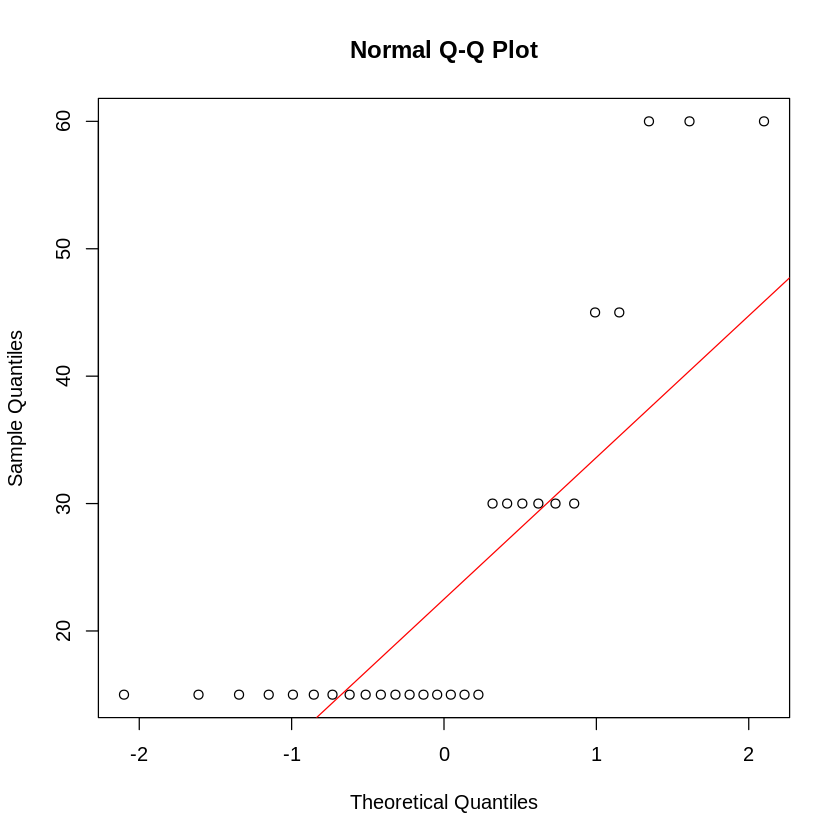

In [67]:
# Q-Q Plot for visual assessment of normality
qqnorm(df$Sleep_onset_latency)
qqline(df$Sleep_onset_latency, col = "red")  # Add reference line

#### Heteroscedasticity
Levene's Test: robust to non-normal data

In [63]:
# Perform Levene's test
levene_test_result_SleepOnsetLatency <- leveneTest(Sleep_onset_latency ~ Group, data = df, center=median)
print(levene_test_result_SleepOnsetLatency)

# Interpret the p-value
if (levene_test_result_SleepOnsetLatency$`Pr(>F)`[1] < 0.05) {
  cat("P is less than 0.05, indicating that there are significant differences in variances across groups.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the variances are equal across groups.\nA parametric test can be used.\n")
}

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  3  2.1176 0.1245
      24               
P is greater than or equal to 0.05, indicating that the variances are equal across groups.
A parametric test can be used.


Because the sleep onset latency data is not normally distributed, need to transform the data.

### Transform the sleep onset latency data
For continuous data, it is most appropriate to log transform. But, first need to check that there are no non-positive numbers because you cannot log transform zero or negative numbers.

In [72]:
# Check for negative values in Sleep_onset_latency
if (any(df$Sleep_onset_latency < 0)) {
  cat("There are negative values in Sleep_onset_latency. Please address them before log transformation.\n")
} else {
  # Perform log transformation (base e or natural log)
  df <- df %>%
    mutate(Sleep_onset_latency_log = log(Sleep_onset_latency))

  # Print the first few rows of the transformed data
  head(df)
}

,Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,⋯,Melotonin,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group,Sleep_quality_percent,Sleep_onset_latency_log
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
1,1,3.5,1,1,2,1.0,1,2,13,1,⋯,0,1,1410,60,7.0,4,1,Binaural Beats,33.33333,4.094345
2,2,5.0,0,1,2,2.0,1,1,14,1,⋯,0,1,1410,30,6.5,1,2,Binaural Beats,66.66667,3.401197
3,3,6.0,1,1,4,1.5,1,1,15,0,⋯,0,1,1530,15,7.0,2,2,Binaural Beats,66.66667,2.708050
4,4,3.0,0,1,2,6.0,1,2,9,0,⋯,0,1,1410,15,7.0,0,3,Binaural Beats,100.00000,2.708050
5,5,3.5,1,0,0,NA,1,1,15,0,⋯,0,1,1410,15,7.0,0,3,Binaural Beats,100.00000,2.708050
6,6,3.0,1,0,0,NA,1,1,14,1,⋯,0,1,1410,15,6.5,2,1,Binaural Beats,33.33333,2.708050


### One-way ANOVA

In [79]:
# Run One-Way ANOVA
anova_result_Sleep_onset_latency_log <- aov(Sleep_onset_latency_log ~ Group, data = df)

# Print ANOVA summary
anova_summary_Sleep_onset_latency_log <- summary(anova_result_Sleep_onset_latency_log)
print(anova_summary_Sleep_onset_latency_log)

# Check p-value of ANOVA
p_value_Sleep_onset_latency_log <- anova_summary_Sleep_onset_latency_log[[1]]["Pr(>F)"][1, 1]  # Extract the p-value from ANOVA summary

# Function to perform Post Hoc Tests only if ANOVA p-value < 0.05
if (p_value_Sleep_onset_latency_log < 0.05) {
  cat("ANOVA is significant (p =", round(p_value_Sleep_onset_latency_log, 4),"). Therefore, run post hoc tests...\n")
  post_hoc_result_Sleep_onset_latency_log <- TukeyHSD(anova_result_Sleep_onset_latency_log)

  # Print the results of the post hoc tests
  print(post_hoc_result_Sleep_onset_latency_log)

  # Visualize the results
  plot(post_hoc_result_Sleep_onset_latency_log)
} else {
  cat("ANOVA is not significant (p =", round(p_value_Sleep_onset_latency_log, 4),"). No post hoc tests will be run.\n")
}

            Df Sum Sq Mean Sq F value Pr(>F)
Group        3  1.019  0.3398   1.338  0.285
Residuals   24  6.094  0.2539               
ANOVA is not significant (p = 0.2854 ). No post hoc tests will be run.


## Wakefullness

#### Normality
Shapiro-Wilk Test: Good for small to moderate sample sizes. <br>
Q-Q Plot: A visual method to assess normality.

In [70]:
# Perform Shapiro-Wilk test for normality on Sleep_quality
shapiro_test_result_Wakefullness <- shapiro.test(df$Wakefulness_after_sleep_onset)

# Print the result
print(shapiro_test_result_Wakefullness)

# Interpret the p-value
if (shapiro_test_result_Wakefullness$p.value < 0.05) {
  cat("P is less than 0.05, indicating that the data deviates from a normal distribution.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the data does not deviate from a normal distribution.\nThe data do not need to be scaled and a parametric test can be used.\n")
}


	Shapiro-Wilk normality test

data:  df$Wakefulness_after_sleep_onset
W = 0.82201, p-value = 0.0002676

P is less than 0.05, indicating that the data deviates from a normal distribution.
A nonparametric test should be used, or the data should be scaled before using a parametric test.


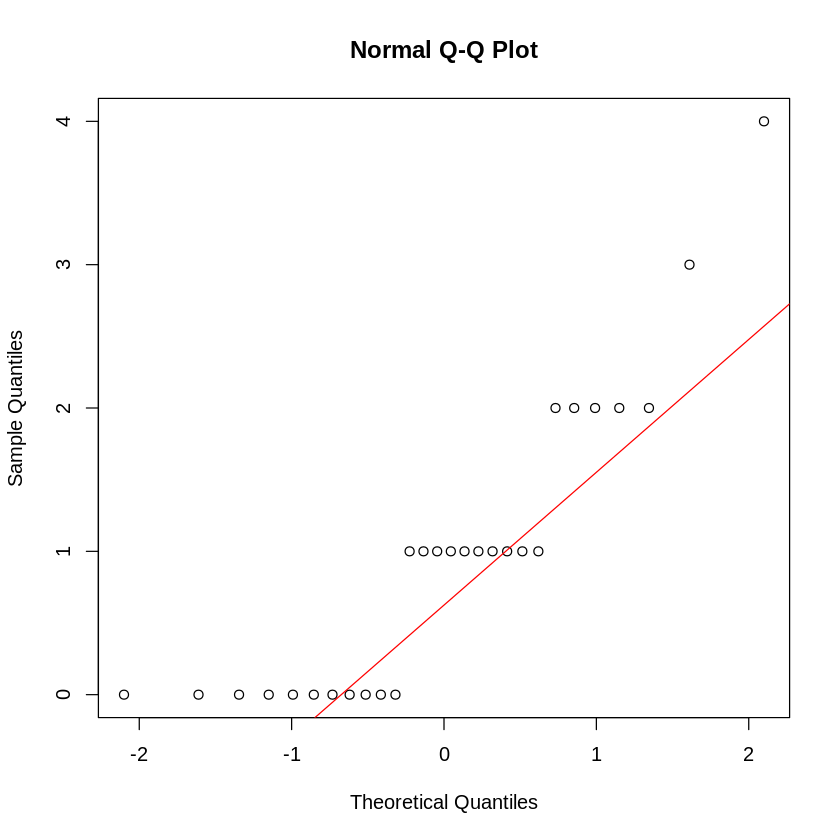

In [69]:
# Q-Q Plot for visual assessment of normality
qqnorm(df$Wakefulness_after_sleep_onset)
qqline(df$Wakefulness_after_sleep_onset, col = "red")  # Add reference line

#### Heteroscedasticity
Levene's Test: robust to non-normal data

In [62]:
# Perform Levene's test
levene_test_result_Wakefullness <- leveneTest(Wakefulness_after_sleep_onset ~ Group, data = df, center=median)
print(levene_test_result_Wakefullness)

# Interpret the p-value
if (levene_test_result_Wakefullness$`Pr(>F)`[1] < 0.05) {
  cat("P is less than 0.05, indicating that there are significant differences in variances across groups.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the variances are equal across groups.\nA parametric test can be used.\n")
}

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  3    1.02 0.4012
      24               
P is greater than or equal to 0.05, indicating that the variances are equal across groups.
A parametric test can be used.


Because the wakefullness data is psychometric and because it is not normally distributed, need to transform the data.

### Transform the wakefullness data
For psychometric data, it is most appropriate to transform to a percent of maximum value.

In [74]:
# Transform Wakefulness_after_sleep_onset to a percentage of maximum value (4)
df <- df %>%
  mutate(Wakefullness_percent = (Wakefulness_after_sleep_onset / 4 * 100))

# Print the first few rows of the transformed data
head(df)

,Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,⋯,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group,Sleep_quality_percent,Sleep_onset_latency_log,Wakefullness_percent
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,1,3.5,1,1,2,1.0,1,2,13,1,⋯,1,1410,60,7.0,4,1,Binaural Beats,33.33333,4.094345,100
2,2,5.0,0,1,2,2.0,1,1,14,1,⋯,1,1410,30,6.5,1,2,Binaural Beats,66.66667,3.401197,25
3,3,6.0,1,1,4,1.5,1,1,15,0,⋯,1,1530,15,7.0,2,2,Binaural Beats,66.66667,2.708050,50
4,4,3.0,0,1,2,6.0,1,2,9,0,⋯,1,1410,15,7.0,0,3,Binaural Beats,100.00000,2.708050,0
5,5,3.5,1,0,0,NA,1,1,15,0,⋯,1,1410,15,7.0,0,3,Binaural Beats,100.00000,2.708050,0
6,6,3.0,1,0,0,NA,1,1,14,1,⋯,1,1410,15,6.5,2,1,Binaural Beats,33.33333,2.708050,50


### One-way ANOVA

In [80]:
# Run One-Way ANOVA
anova_result_Wakefullness_percent <- aov(Wakefullness_percent ~ Group, data = df)

# Print ANOVA summary
anova_summary_Wakefullness_percent <- summary(anova_result_Wakefullness_percent)
print(anova_summary_Wakefullness_percent)

# Check p-value of ANOVA
p_value_Wakefullness_percent <- anova_summary_Wakefullness_percent[[1]]["Pr(>F)"][1, 1]  # Extract the p-value from ANOVA summary

# Function to perform Post Hoc Tests only if ANOVA p-value < 0.05
if (p_value_Wakefullness_percent < 0.05) {
  cat("ANOVA is significant (p =", round(p_value_Wakefullness_percent, 4),"). Therefore, run post hoc tests...\n")
  post_hoc_result_Wakefullness_percent <- TukeyHSD(anova_result_Wakefullness_percent)

  # Print the results of the post hoc tests
  print(post_hoc_result_Wakefullness_percent)

  # Visualize the results
  plot(post_hoc_result_Wakefullness_percent)
} else {
  cat("ANOVA is not significant (p =", round(p_value_Wakefullness_percent, 4),"). No post hoc tests will be run.\n")
}

            Df Sum Sq Mean Sq F value Pr(>F)
Group        3   3817  1272.3   2.138  0.122
Residuals   24  14286   595.2               
ANOVA is not significant (p = 0.1219 ). No post hoc tests will be run.


## Interpretation of ANOVA results
One-way ANOVA found that the null hypothesis was not rejected (P>0.05) for any of the 4 variables (sleep duration, sleep quality, sleep latency onset, or wakefullness), i.e., the between-group differences were not statistically significant at the 5% level. Therefore, I conclude that neither pre-bed melatonin nor pre-bed binaural beats influenced my sleep duration or quality.

## Effect sizes for the between group comparisons
To further interpret the data, I also calculated Cohen's d, a measure of effect size used to indicate the standardized difference between two means. Cohen's d values were interpreted to infer trivial (d<0.20), small (0.20≤d<0.50), moderate (0.50≤d<0.80), or large effects (d≥0.80).
<br><br>
The ANOVA table also generates Eta-squared (η²), a type of effect size that is interpreted to infer a trivial (η²<0.01), small (0.01≤η²<0.06), medium (0.06≤η²<0.14), or large effect (η²≥0.14).

### Sleep quality

In [105]:
# Calculate mean, standard deviation, and sample size for Sleep_quality_percent in all groups
group_stats <- df %>%
  group_by(Group) %>%
  summarise(
    mean_value = mean(Sleep_quality_percent, na.rm = TRUE),
    sd_value = sd(Sleep_quality_percent, na.rm = TRUE),
    n_value = n()
  )

# Extract the data
meanControl_Sleep_quality_percent <- group_stats %>% filter(Group == "Control") %>% pull(mean_value)
sdControl_Sleep_quality_percent <- group_stats %>% filter(Group == "Control") %>% pull(sd_value)
nControl_Sleep_quality_percent <- group_stats %>% filter(Group == "Control") %>% pull(n_value)

meanMelotonin_Sleep_quality_percent <- group_stats %>% filter(Group == "Melotonin") %>% pull(mean_value)
sdMelotonin_Sleep_quality_percent <- group_stats %>% filter(Group == "Melotonin") %>% pull(sd_value)
nMelotonin_Sleep_quality_percent <- group_stats %>% filter(Group == "Melotonin") %>% pull(n_value)

meanBinaural_Beats_Sleep_quality_percent <- group_stats %>% filter(Group == "Binaural Beats") %>% pull(mean_value)
sdBinaural_Beats_Sleep_quality_percent <- group_stats %>% filter(Group == "Binaural Beats") %>% pull(sd_value)
nBinaural_Beats_Sleep_quality_percent <- group_stats %>% filter(Group == "Binaural Beats") %>% pull(n_value)

meanMelotoninBinauralBeats_Sleep_quality_percent <- group_stats %>% filter(Group == "Melotonin + Binaural Beats") %>% pull(mean_value)
sdMelotoninBinauralBeats_Sleep_quality_percent <- group_stats %>% filter(Group == "Melotonin + Binaural Beats") %>% pull(sd_value)
nMelotoninBinauralBeats_Sleep_quality_percent <- group_stats %>% filter(Group == "Melotonin + Binaural Beats") %>% pull(n_value)

# Calculate pooled standard deviation
pooled_sd_Sleep_quality_percent <- sqrt(((nControl_Sleep_quality_percent - 1) * sdControl_Sleep_quality_percent^2 +
                                        (nMelotonin_Sleep_quality_percent - 1) * sdMelotonin_Sleep_quality_percent^2 +
                                        (nBinaural_Beats_Sleep_quality_percent - 1) * sdBinaural_Beats_Sleep_quality_percent^2 +
                                        (nMelotoninBinauralBeats_Sleep_quality_percent - 1) * sdMelotoninBinauralBeats_Sleep_quality_percent^2) /
                                        (nControl_Sleep_quality_percent + nMelotonin_Sleep_quality_percent + nBinaural_Beats_Sleep_quality_percent + nMelotoninBinauralBeats_Sleep_quality_percent - 4))

# Calculate Cohen's d
cohen_d_Sleep_quality_percent_MelotoninVsControl <- (meanMelotonin_Sleep_quality_percent - meanControl_Sleep_quality_percent) / pooled_sd_Sleep_quality_percent
cohen_d_Sleep_quality_percent_BeatsVsControl <- (meanBinaural_Beats_Sleep_quality_percent - meanControl_Sleep_quality_percent) / pooled_sd_Sleep_quality_percent
cohen_d_Sleep_quality_percent_BothVsControl <- (meanMelotoninBinauralBeats_Sleep_quality_percent - meanControl_Sleep_quality_percent) / pooled_sd_Sleep_quality_percent

# Function to interpret Cohen's d
interpret_cohens_d <- function(d) {
  if (d < 0.20) {
    return("(a trivial effect; d < 0.20).")
  } else if (d < 0.50) {
    return("(a small effect; 0.20 ≤ d < 0.50).")
  } else if (d < 0.80) {
    return("(a moderate effect; 0.50 ≤ d < 0.80).")
  } else {
    return("(a large effect; d ≥ 0.80).")
  }
}

# Print Cohen's d values with interpretation
cat("Cohen's d (Melotonin vs. Control) =", round(cohen_d_Sleep_quality_percent_MelotoninVsControl, 3),
    interpret_cohens_d(cohen_d_Sleep_quality_percent_MelotoninVsControl), "\n\n")

cat("Cohen's d (Binaural Beats vs. Control) =", round(cohen_d_Sleep_quality_percent_BeatsVsControl, 3),
    interpret_cohens_d(cohen_d_Sleep_quality_percent_BeatsVsControl), "\n\n")

cat("Cohen's d (Melotonin + Binaural Beats vs. Control) =", round(cohen_d_Sleep_quality_percent_BothVsControl, 3),
    interpret_cohens_d(cohen_d_Sleep_quality_percent_BothVsControl), "\n\n")

Cohen's d (Melotonin vs. Control) = 0.579 (a moderate effect; 0.50 ≤ d < 0.80). 

Cohen's d (Binaural Beats vs. Control) = 0.579 (a moderate effect; 0.50 ≤ d < 0.80). 

Cohen's d (Melotonin + Binaural Beats vs. Control) = 0.965 (a large effect; d ≥ 0.80). 



In [107]:
# Calculate eta-squared for Sleep quality
ss_effect_Sleep_quality_percent <- anova_summary_Sleep_quality_percent[[1]][1, "Sum Sq"]  # Sum of squares for the effect
ss_total_Sleep_quality_percent <- sum(anova_summary_Sleep_quality_percent[[1]][, "Sum Sq"])  # Total sum of squares
eta_squared_Sleep_quality_percent <- ss_effect_Sleep_quality_percent / ss_total_Sleep_quality_percent  # Calculate eta-squared

# Print eta-squared result
cat("Eta-squared (η²) =", round(eta_squared_Sleep_quality_percent, 3))

# Print and interpret eta-squared
if (eta_squared_Sleep_quality_percent < 0.01) {
  cat(" (a trivial effect; η² < 0.01)\n")
} else if (eta_squared_Sleep_quality_percent < 0.06) {
  cat(" (a small effect; 0.01 ≤ η² < 0.06)\n")
} else if (eta_squared_Sleep_quality_percent < 0.14) {
  cat(" (a moderate effect; 0.06 ≤ η² < 0.14)\n")
} else {
  cat(" (a large effect; η² ≥ 0.14)\n")
}

Eta-squared (η²) = 0.122 (a moderate effect; 0.06 ≤ η² < 0.14)
